In [1]:
import numpy as np
from collections import Counter
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
data = pd.read_excel("C:/Users/A_And/Downloads/02_Автоаварии.xls")

data.dropna(axis=0, subset=["Visibility(mi)", "Severity", "Wind_Speed(mph)", "Humidity(%)", "Temperature(F)"],
 inplace=True)

x = (data[["Severity", "Visibility(mi)", "Wind_Speed(mph)", "Humidity(%)", "Temperature(F)"]])

def mean(x):
    return np.sum(x) / len(x)

def middle_dev(x):
    return sqrt(mean(x * x) - mean(x) ** 2)

def cov(x1, x2):
    return mean((x1 - mean(x1)) * (x2 - mean(x2)))


def cov_matrix(eps):
    n = eps.shape[1]
    cols = eps.columns
    res = []
    for i in range(n):
        res.append([0, ] * n)
    for i in range(n):
        for j in range(i, n):
            res[i][j] = res[j][i] = cov(eps[cols[i]], eps[cols[j]])
    return res

def corr_matrix(eps):
    n = eps.shape[1]
    cols = eps.columns
    res = []
    for i in range(n):
        res.append([0, ] * n)
    for i in range(n):
        for j in range(i, n):
            res[i][j] = res[j][i] = np.corrcoef(eps[cols[i]], eps[cols[j]])
    return res

print("Математическое ожидание numpy ", np.mean(data["Visibility(mi)"]))
print("Математическое ожидание", mean(data["Visibility(mi)"]))

print("\nКовариационная матрица numpy ", np.cov(x, rowvar=False))
lst = cov_matrix(x)
print("\nКовариационная матрица", lst[0])
print(lst[1])
print(lst[2])
print(lst[3])
print(lst[4])

print("\nКорреляционная матрица numpy ", np.corrcoef(x, rowvar=False))
lst = corr_matrix(x)
print("\nКорреляционная матрица", lst[0])
print(lst[1])
print(lst[2])
print(lst[3])
print(lst[4])

Математическое ожидание numpy  9.469772073467581
Математическое ожидание 9.469772073467581

Ковариационная матрица numpy  [[ 2.47579621e-01  3.82924107e-02  1.79756771e-01  4.48914382e-01
  -1.04471269e-01]
 [ 3.82924107e-02  3.42579258e+00  4.35475775e-01 -1.78702792e+01
   1.56500651e+01]
 [ 1.79756771e-01  4.35475775e-01  1.86122213e+01 -3.45145655e+00
  -1.40489713e+00]
 [ 4.48914382e-01 -1.78702792e+01 -3.45145655e+00  5.64037969e+02
  -3.71785181e+02]
 [-1.04471269e-01  1.56500651e+01 -1.40489713e+00 -3.71785181e+02
   3.42310441e+02]]

Ковариационная матрица [0.24752483441235867, 0.038283937099001394, 0.17971699339725694, 0.4488150422491429, -0.10444815112959402]
[0.038283937099001394, 3.425034491089992, 0.43537940982483986, -17.866324742018907, 15.646601950281372]
[0.17971699339725694, 0.43537940982483986, 18.608102595120865, -3.450692786832377, -1.404586240358809]
[0.4488150422491429, -17.866324742018907, -3.450692786832377, 563.9131538784314, -371.70290954163147]
[-0.10444815

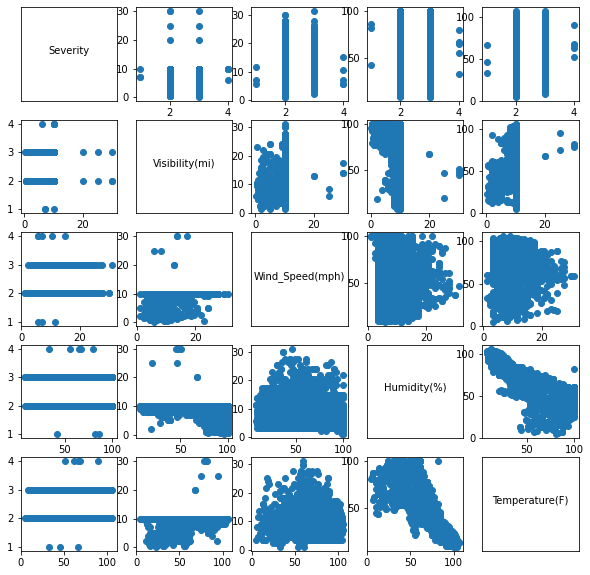

In [3]:
fig, axes = plt.subplots(x.shape[1], x.shape[1], figsize=(2 * x.shape[1], 2 * x.shape[1]))
cols = x.columns
for i in range(len(cols)):
    for j in range(len(cols)):
        if i == j:
            axes[i][j].annotate(cols[i], (0.5, 0.5), ha="center")
            axes[i][j].xaxis.set_visible(False)
            axes[i][j].yaxis.set_visible(False)
        else:
            axes[i][j].scatter(x[cols[i]], x[cols[j]])
plt.show()

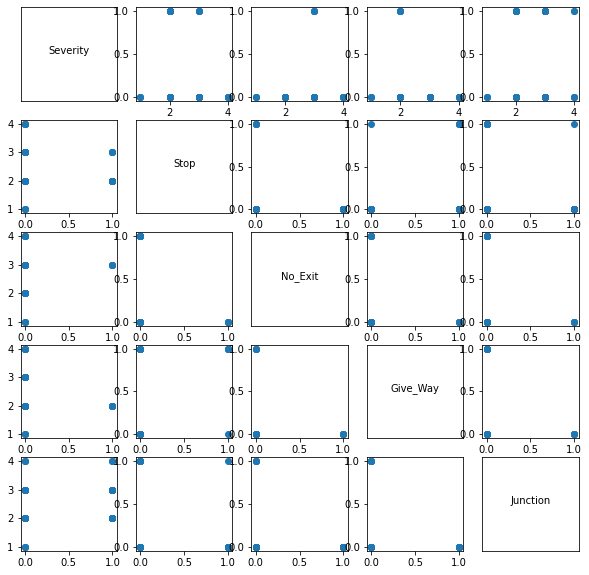

In [4]:
data.dropna(axis=0, subset=['Severity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout','Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'],
 inplace=True)
x2 = data[['Severity', 'Stop', 'No_Exit', 'Give_Way', 'Junction']]
cols = x2.columns
fig, axes = plt.subplots(x2.shape[1], x2.shape[1], figsize=(2 * x2.shape[1], 2 * x2.shape[1]))
cols = x2.columns
for i in range(len(cols)):
    for j in range(len(cols)):
        if i == j:
            axes[i][j].annotate(cols[i], (0.5, 0.5), ha="center")
            axes[i][j].xaxis.set_visible(False)
            axes[i][j].yaxis.set_visible(False)
        else:
            axes[i][j].scatter(x2[cols[i]], x2[cols[j]])
plt.show()

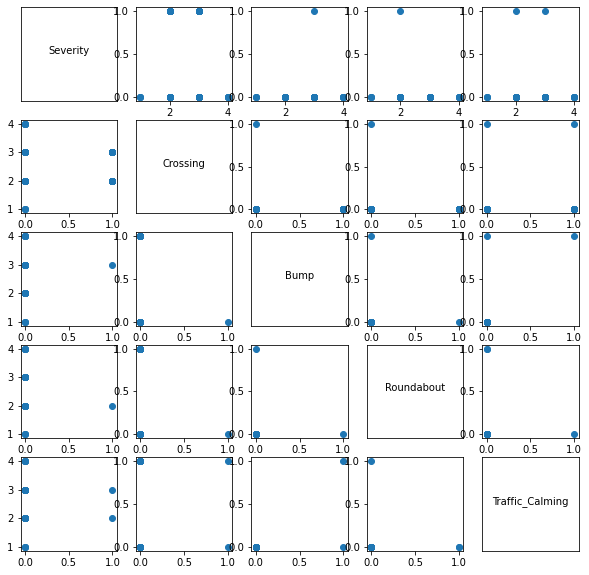

In [5]:
x2 = data[['Severity', 'Crossing','Bump', 'Roundabout','Traffic_Calming']]
cols = x2.columns
fig, axes = plt.subplots(x2.shape[1], x2.shape[1], figsize=(2 * x2.shape[1], 2 *x2.shape[1]))
cols = x2.columns
for i in range(len(cols)):
    for j in range(len(cols)):
        if i == j:
            axes[i][j].annotate(cols[i], (0.5, 0.5), ha="center")
            axes[i][j].xaxis.set_visible(False)
            axes[i][j].yaxis.set_visible(False)
        else:
            axes[i][j].scatter(x2[cols[i]], x2[cols[j]])
plt.show()

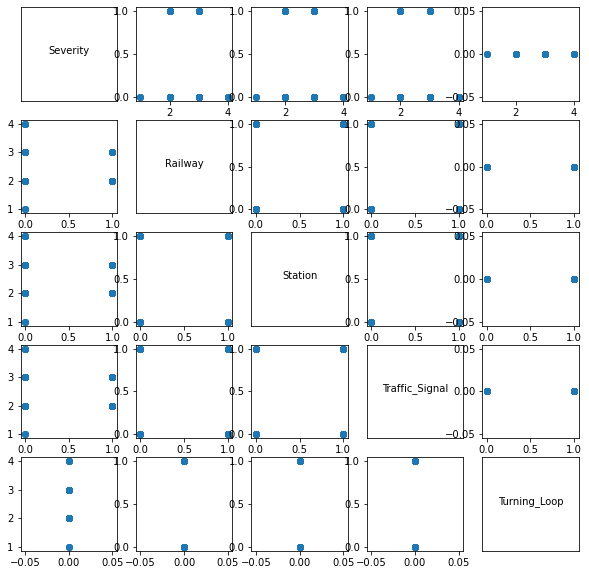

In [6]:
x2 = data[['Severity', 'Railway', 'Station', 'Traffic_Signal', 'Turning_Loop']]
cols = x2.columns
fig, axes = plt.subplots(x2.shape[1], x2.shape[1], figsize=(2 * x2.shape[1], 2 *x2.shape[1]))
cols = x2.columns
for i in range(len(cols)):
    for j in range(len(cols)):
        if i == j:
            axes[i][j].annotate(cols[i], (0.5, 0.5), ha="center")
            axes[i][j].xaxis.set_visible(False)
            axes[i][j].yaxis.set_visible(False)
        else:
            axes[i][j].scatter(x2[cols[i]], x2[cols[j]])
plt.show()